In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties.umath import *

In [251]:
chains = np.load('/Users/tgardner/ARMADA_orbits/HD140436_chi2err/HD140436__chains.npy')
print(chains.shape)

(6400, 7)


In [252]:
best_values = open('/Users/tgardner/ARMADA_orbits/HD140436_chi2err/140436__orbit_ls.txt')
params = best_values.readlines()[2].split()
print(params)
best_values.close()

P_best = float(params[0])
a_best = float(params[1])
e_best = float(params[2])
inc_best = float(params[3])
w_best = float(params[4])
bigw_best = float(params[5])
T_best = float(params[6])
resid = float(params[-1])

['33724.69628144388', '724.8866391247027', '0.46540927075651295', '94.46503750409838', '104.20653346423897', '112.75597242006212', '26338.89641539418', '1', '99.22']


In [253]:
w_chains = chains[:,0]
bigw_chains = chains[:,1]
inc_chains = chains[:,2]
e_chains = chains[:,3]
a_chains = chains[:,4]
P_chains = chains[:,5]
T_chains = chains[:,6]

w_err = np.nanstd(chains[:,0])
bigw_err = np.nanstd(chains[:,1])
inc_err = np.nanstd(chains[:,2])
e_err = np.nanstd(chains[:,3])
a_err = np.nanstd(chains[:,4])
P_err = np.nanstd(chains[:,5])
T_err = np.nanstd(chains[:,6])

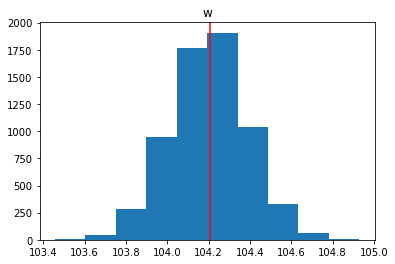

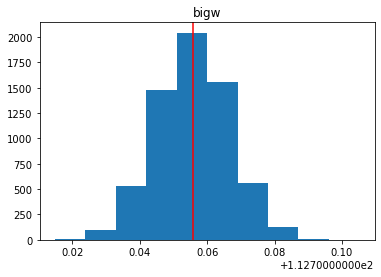

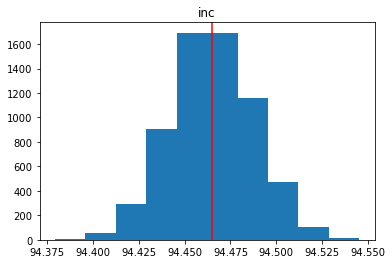

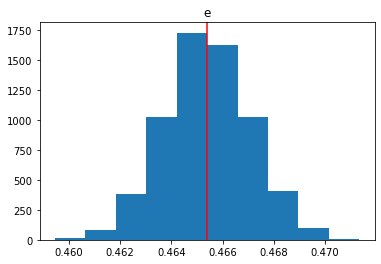

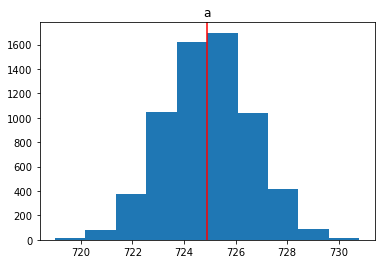

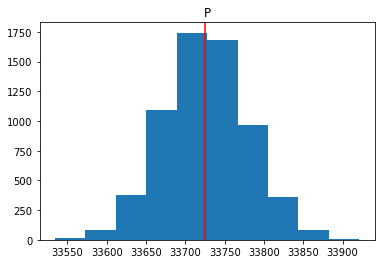

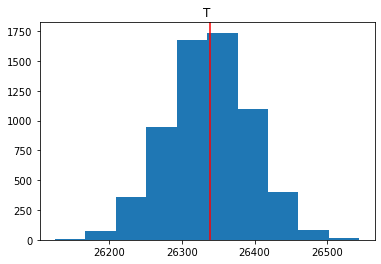

In [254]:
plt.hist(w_chains)
plt.axvline(x=w_best,color='red')
plt.title('w')
plt.show()

plt.hist(bigw_chains)
plt.axvline(x=bigw_best,color='red')
plt.title('bigw')
plt.show()

plt.hist(inc_chains)
plt.axvline(x=inc_best,color='red')
plt.title('inc')
plt.show()

plt.hist(e_chains)
plt.axvline(x=e_best,color='red')
plt.title('e')
plt.show()

plt.hist(a_chains)
plt.axvline(x=a_best,color='red')
plt.title('a')
plt.show()

plt.hist(P_chains)
plt.axvline(x=P_best,color='red')
plt.title('P')
plt.show()

plt.hist(T_chains)
plt.axvline(x=T_best,color='red')
plt.title('T')
plt.show()

In [255]:
P = ufloat(P_best,P_err)/365.25
a = ufloat(a_best,a_err)
e = ufloat(e_best,e_err)
inc = ufloat(inc_best,inc_err)
w = ufloat(w_best,w_err)
bigw = ufloat(bigw_best,bigw_err)
T = ufloat(T_best,T_err)

print(P.n,P.s,a.n,a.s,e.n,e.s,inc.n,inc.s,w.n,w.s,bigw.n,bigw.s,T.n,T.s,resid)

92.33318625994218 0.14487613987290798 724.8866391247027 1.6585639491700195 0.46540927075651295 0.001649319581219023 94.46503750409838 0.02283096041694197 104.20653346423897 0.1866076817220835 112.75597242006212 0.010743105420519821 26338.89641539418 57.18338748215294 99.22


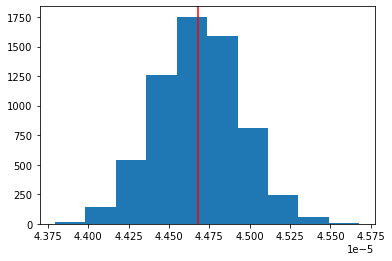

In [256]:
M_dyn_over_d3 = (a_chains/1000)**3 / (P_chains / 365.25)**2
M_dyn_best = (a_best/1000)**3 / (P_best / 365.25)**2

plt.hist(M_dyn_over_d3)
plt.axvline(x=M_dyn_best,color='r')
plt.show()

In [257]:
print(M_dyn_best,np.nanstd(M_dyn_over_d3))

4.467809425499981e-05 2.6000909225401163e-07
